In [1]:
pip install mesa


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ipykernel plotly scikit-learn pandas numpy matplotlib nbformat  pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mesa import Agent, Model
from mesa.space import SingleGrid
from mesa.time import RandomActivation
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer
import pyreadstat
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
from mesa.visualization.modules import CanvasGrid, ChartModule
from mesa.visualization.ModularVisualization import ModularServer
from mesa.visualization.UserParam import UserSettableParameter

In [5]:
## Create dataframe for Agent Based Modelling from  Global Entrepreneurship Survey
## Import Enterpreneural Intention data of Global Entrepreneurship Survey
E_I, meta = pyreadstat.read_sav("/Volumes/My_Files/Python Code for ABM/GEM 2016 APS Global - Individual Level Data.sav")

In [6]:
## CREATE a dictionary of all labels in the Entrepreneurial Intention
var_E_I = meta.column_labels

In [7]:
# Rename columns using var_E_I dictionary
E_I_df = E_I.rename(columns=dict(zip(E_I.columns, var_E_I)))

In [8]:
## Select only France Data from Entrepreneurial Intentions
Subset_E_I = E_I_df[E_I_df['Country'] == 33]

In [9]:
## Import  Government concrete policies, priority and support from Global Entrepreneurship Survey 
G_P,META = pyreadstat.read_sav("/Volumes/My_Files/Python Code for ABM/Untitled2.sav")

In [10]:
## Select only France Data from Government Policy dataframe
G_P= G_P[G_P['NES_COUNTRY'] == 33]

In [11]:
## Create a dictionary of all labels in the Government Policy Dataframe
var_G_P = META.column_labels

In [12]:
# Rename columns using var_G_P dictionary
G_P_DF = G_P.rename(columns=dict(zip(G_P.columns, var_G_P)))

In [13]:
## Change name of the columns
G_P_DF = G_P_DF.rename(columns={'Country phone code (up to 4 digits), regional codes are assigned by GEM Global, ask for a regional code if it is not in the list' : 'Country'})

In [14]:
for col in G_P_DF.columns:
    print(col)

Case number countries in alphabetical order
Country
StartDate
EndDate
Finished
VARIABLES EXPRESSED IN 9 POINTS SCALES
In my country, there is sufficient equity funding available for new and growing firms
In my country, there is sufficient debt funding available for new and growing firms
In my country, there are sufficient government subsidies available for new and growing firms
In my country, there is sufficient funding available from informal investors (family, friends and colleagues) who are private individuals (other than founders) for new and growing firms
In my country, there is sufficient funding available from professional Business Angels for new and growing firms
In my country, there is sufficient funding available from venture capitalists for new and growing firms
In my country, there is sufficient funding available through initial public offerings (IPOs) for new and growing firms
In my country, there is sufficient funding available through private lenders' funding (crowdfundi

In [15]:
## Select only Specific Column for the final dataframe from Entrepreneurial intentions
S_S_E_I = Subset_E_I[['Country', 'Entrepreneurial intentions (in 18-64 sample that is not involved in entrepreneurial activity)']]

In [16]:
S_S_E_I = S_S_E_I.rename(columns={'Entrepreneurial intentions (in 18-64 sample that is not involved in entrepreneurial activity)' : 'Entrepreneurial intentions'})
S_S_E_I

,Country,Entrepreneurial intentions
14921,33.0,0.0
14922,33.0,NaN
14923,33.0,0.0
14924,33.0,0.0
14925,33.0,0.0
...,...,...
16922,33.0,0.0
16923,33.0,0.0
16924,33.0,1.0
16925,33.0,0.0


In [17]:
S_S_G_P = G_P_DF.iloc[:,[1,318]]

In [18]:
S_S_G_P

,Country,"Government concrete policies, priority and support"
253,33.0,5.058893
254,33.0,4.809580
255,33.0,2.000000
256,33.0,4.453082
257,33.0,3.574009
258,33.0,7.000000
259,33.0,7.000000
260,33.0,6.297605
261,33.0,5.463683
262,33.0,5.511975


In [19]:
result = pd.concat([S_S_E_I, S_S_G_P], axis=1)

In [20]:
result

,Country,Entrepreneurial intentions,Country,"Government concrete policies, priority and support"
14921,33.0,0.0,NaN,NaN
14922,33.0,NaN,NaN,NaN
14923,33.0,0.0,NaN,NaN
14924,33.0,0.0,NaN,NaN
14925,33.0,0.0,NaN,NaN
...,...,...,...,...
285,NaN,NaN,33.0,7.000000
286,NaN,NaN,33.0,3.096584
287,NaN,NaN,33.0,4.857872
288,NaN,NaN,33.0,2.383589


In [21]:
# Merging the two data frames based on the 'name' column
df_merged = pd.merge(S_S_E_I, S_S_G_P, on='Country')

In [22]:
df_merged

,Country,Entrepreneurial intentions,"Government concrete policies, priority and support"
0,33.0,0.0,5.058893
1,33.0,0.0,4.809580
2,33.0,0.0,2.000000
3,33.0,0.0,4.453082
4,33.0,0.0,3.574009
...,...,...,...
74217,33.0,0.0,7.000000
74218,33.0,0.0,3.096584
74219,33.0,0.0,4.857872
74220,33.0,0.0,2.383589


In [23]:
num_nan = df_merged['Entrepreneurial intentions'].isna().sum()
num_nan1 = df_merged['Government concrete policies, priority and support'].isna().sum()



In [24]:
# Dropping all NaN values from the DataFrame
df_merged = df_merged.dropna()


In [25]:
# Replacing all cell values in the 'Gender' column with 'Female'
df_merged['Entrepreneurial intentions'] = df_merged['Entrepreneurial intentions'].replace({0.0: 'No', 1.0: 'Yes'})

/var/folders/tz/c4w55wbj3x9dyxm2sn_sz57m0000gn/T/ipykernel_49137/4108352526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Entrepreneurial intentions'] = df_merged['Entrepreneurial intentions'].replace({0.0: 'No', 1.0: 'Yes'})


In [26]:
df_merged

,Country,Entrepreneurial intentions,"Government concrete policies, priority and support"
0,33.0,No,5.058893
1,33.0,No,4.809580
2,33.0,No,2.000000
3,33.0,No,4.453082
4,33.0,No,3.574009
...,...,...,...
74217,33.0,No,7.000000
74218,33.0,No,3.096584
74219,33.0,No,4.857872
74220,33.0,No,2.383589


In [27]:
df_merged = df_merged.rename(columns={'Entrepreneurial intentions (in 18-64 sample that is not involved in entrepreneurial activity)': 'Entrepreneurial Intentions', 'Government concrete policies, priority and support': 'Government Support'})

In [28]:
df_merged

,Country,Entrepreneurial intentions,Government Support
0,33.0,No,5.058893
1,33.0,No,4.809580
2,33.0,No,2.000000
3,33.0,No,4.453082
4,33.0,No,3.574009
...,...,...,...
74217,33.0,No,7.000000
74218,33.0,No,3.096584
74219,33.0,No,4.857872
74220,33.0,No,2.383589


In [29]:
# Creating a Column with Agent the 'Agent' column
# Generating values for the new Series
df_merged['Agent'] = range(1, len(df_merged)+1)

In [30]:
df_merged = df_merged.dropna()

In [31]:
# Remove column name 'A'
vv = df_merged.drop(['Country'], axis=1)

In [32]:
vv['Entrepreneurial intentions'] = vv['Entrepreneurial intentions'].replace({'No':0, 'Yes':1})

In [33]:
vv = vv.rename(columns={'Agent' : 'Agent ID', 'Entrepreneurial intentions': 'Intentions','Government Support': 'Support' })
vv['Intentions'] = vv['Intentions'].replace({0:'No', 1:'Yes'})


In [34]:
vv.iloc[:, [2,0,1]]

,Agent ID,Intentions,Support
0,1,No,5.058893
1,2,No,4.809580
2,3,No,2.000000
3,4,No,4.453082
4,5,No,3.574009
...,...,...,...
74217,65552,No,7.000000
74218,65553,No,3.096584
74219,65554,No,4.857872
74220,65555,No,2.383589


In [35]:
nv = vv.iloc[:, [2,0,1]]
nv

,Agent ID,Intentions,Support
0,1,No,5.058893
1,2,No,4.809580
2,3,No,2.000000
3,4,No,4.453082
4,5,No,3.574009
...,...,...,...
74217,65552,No,7.000000
74218,65553,No,3.096584
74219,65554,No,4.857872
74220,65555,No,2.383589


In [36]:
nv = nv.rename(columns={'Agent ID' : 'Agent', 'Intentions': 'intentions','Support': 'support' })

In [37]:
nv

,Agent,intentions,support
0,1,No,5.058893
1,2,No,4.809580
2,3,No,2.000000
3,4,No,4.453082
4,5,No,3.574009
...,...,...,...
74217,65552,No,7.000000
74218,65553,No,3.096584
74219,65554,No,4.857872
74220,65555,No,2.383589


In [38]:
class MyAgent(Agent):
    def __init__(self, unique_id, intentions, support, model):
        super().__init__(unique_id, model)
        self.intentions = intentions
        self.support = support

    def step(self):
        # Count the number of agents with 'Yes' and 'No' intentions
        num_yes = sum([1 for a in self.model.schedule.agents if a.intentions == 'Yes'])
        num_no = sum([1 for a in self.model.schedule.agents if a.intentions == 'No'])

        # Calculate the mean support level of agents with the same intention
        support_yes = np.mean([a.support for a in self.model.schedule.agents if a.intentions == 'Yes'])
        support_no = np.mean([a.support for a in self.model.schedule.agents if a.intentions == 'No'])

        # Update the agent's intention based on the mean support levels of agents with the same intention
        if self.intentions == 'Yes':
            if support_yes < support_no:
                self.intentions = 'No'
        else:
            if support_no < support_yes:
                self.Intentions = 'Yes'

        # Update the agent's support level based on the number of agents with the same intention
        if self.intentions == 'Yes':
            self.support = 1 - (num_yes / self.model.num_agents)
        else:
            self.support = 1 - (num_no / self.model.num_agents)

In [39]:
class MyModel(Model):
    def __init__(self, N, width, height, support = 0.5):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.support = support
        self.datacollector = DataCollector(
            model_reporters={"Yes": count_yes, "No": count_no},
            agent_reporters={"intentions": lambda a: a.intentions,
                             "support": lambda a: a.support})
        
        # Create agents
        for i in range(self.num_agents):
            a = MyAgent(i, intentions=random.choice(['Yes', 'No']), support=0.5, model=self)
            self.schedule.add(a)
            
            # Place agents randomly on the grid
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            
            # Assign random intentions and support to agents
            a.intentions = random.choice(['Yes', 'No'])
            a.support = np.random.uniform(0, 1)
            
    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)

In [40]:
def count_yes(model):
    return sum([1 for a in model.schedule.agents if a.intentions == 'Yes'])

def count_no(model):
    return sum([1 for a in model.schedule.agents if a.intentions == 'No'])

In [41]:
# Create a model with 10 agents on a 5x5 grid
model = MyModel(1000, 5, 5)

In [42]:
# Run the model for 100 steps
for i in range(200):
    model.step()
# Collect the data from the model
data = model.datacollector.get_model_vars_dataframe()

In [43]:
def agent_portrayal(agent):
    portrayal = {"Shape": "circle",
                 "Filled": "true",
                 "r": 0.5}
    if agent.intentions == "Yes":
        portrayal["Color"] = "green"
    else:
        portrayal["Color"] = "red"
    return portrayal

grid = CanvasGrid(agent_portrayal, 5, 5, 500, 500)
chart = ChartModule([{"Label": "Support", "Color": "green"}])

model_params = {"N": UserSettableParameter('slider', 'Number of agents', 10, 1, 100),
                "width": 5,
                "height": 5}

server = ModularServer(MyModel, [grid, chart], "My Model", model_params)
server.port = 8521  # The default
server.launch()

/Volumes/My_Files/Python Code for ABM/.conda/lib/python3.10/site-packages/mesa/visualization/UserParam.py:69: UserWarning: UserSettableParameter is deprecated in favor of UserParam objects such as Slider, Checkbox, Choice, StaticText, NumberInput. See the examples folder for how to use them. UserSettableParameter will be removed in the next major release.
  warn(


Interface starting at http://127.0.0.1:8521


RuntimeError: This event loop is already running

Socket opened!
{"type":"reset"}


ERROR:tornado.application:Uncaught exception GET /ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8521', method='GET', uri='/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/Volumes/My_Files/Python Code for ABM/.conda/lib/python3.10/site-packages/tornado/websocket.py", line 630, in _run_callback
    result = callback(*args, **kwargs)
  File "/Volumes/My_Files/Python Code for ABM/.conda/lib/python3.10/site-packages/mesa/visualization/ModularVisualization.py", line 236, in on_message
    self.write_message(self.viz_state_message)
  File "/Volumes/My_Files/Python Code for ABM/.conda/lib/python3.10/site-packages/mesa/visualization/ModularVisualization.py", line 219, in viz_state_message
    return {"type": "viz_state", "data": self.application.render_model()}
  File "/Volumes/My_Files/Python Code for ABM/.conda/lib/python3.10/site-packages/mesa/visualization/ModularVisualization.py", line 393, in render_model
    element_state = 

In [44]:
data

,Yes,No
0,455,545
1,455,545
2,455,545
3,455,545
4,455,545
...,...,...
195,455,545
196,455,545
197,455,545
198,455,545


<module 'matplotlib.pyplot' from '/Volumes/My_Files/Python Code for ABM/.conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

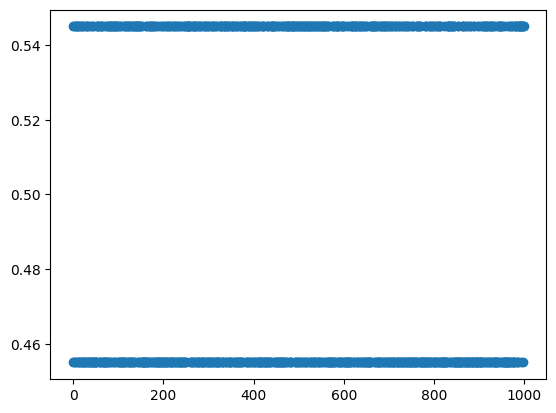

In [45]:
x = [a.unique_id for a in model.schedule.agents]
y = [a.support for a in model.schedule.agents]
plt.scatter(x, y)
plt

In [46]:
out = model.datacollector.get_agent_vars_dataframe().groupby('Step').sum()
out

,intentions,support
Step,,
1,YesNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoY...,498.382
2,YesNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoY...,495.950
3,YesNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoY...,495.950
4,YesNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoY...,495.950
5,YesNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoY...,495.950
...,...,...
196,YesNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoY...,495.950
197,YesNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoY...,495.950
198,YesNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoY...,495.950


<Axes: xlabel='Step'>

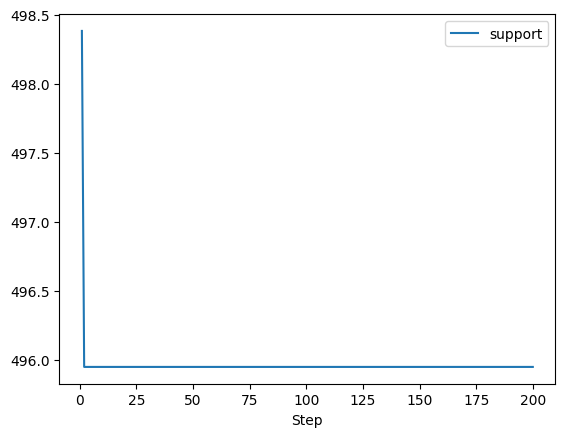

In [47]:
out.plot()

In [48]:
class MyAgent(Agent):
    def __init__(self, unique_id, model, intentions, support):
        super().__init__(unique_id, model)
        self.intentions = intentions
        self.support = support

class MyModel(Model):
    def __init__(self, num_agents):
        self.schedule = RandomActivation(self)
        for i in range(num_agents):
            agent = MyAgent(i, self, nv['intentions'][i], nv['support'][i])
            self.schedule.add(agent)

        self.support_values = [[] for _ in range(num_agents)]

    def step(self):
        self.schedule.step()
        for i, agent in enumerate(self.schedule.agents):
            self.support_values[i].append(agent.support)

model = MyModel(3)
for i in range(10):
    model.step()

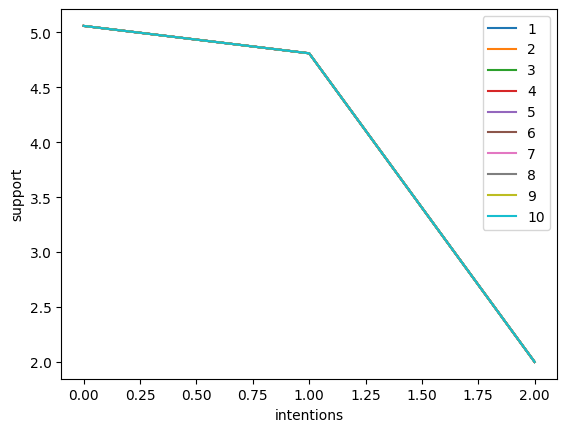

In [49]:
# Plot the support values over time
support_values = pd.DataFrame(model.support_values)
support_values.plot()
plt.xlabel('intentions')
plt.ylabel('support')
plt.legend(nv['Agent'])
plt.show()